In [41]:
print('\nEnabling interactive shell outputs ...')
print('   Use command pass; to disable cell text outputs')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore') 
warnings.simplefilter(action="ignore",category=UserWarning)
warnings.simplefilter(action="ignore",category=FutureWarning)

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd



%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}


Enabling interactive shell outputs ...
   Use command pass; to disable cell text outputs


In [42]:
def check_anova_normality(group, x):

    kws = dict(color='blue', marker='o', markersize=7, alpha=0.5)
    sns1_kws = dict(color='blue', marker='o', s=80, alpha=0.5)
    sns2_kws = dict(marker='o', s=8, alpha=0.5)

    T = len(x)
    
    fig = plt.figure(figsize=(10,8))

    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)

    #ax1.plot(x, color='blue', alpha=0.5, linestyle='--', marker='o', ms=4)
    n=len(x)
    sns.residplot(np.linspace(1,n,n), x, ax=ax1, scatter_kws=sns1_kws) # color='blue', ax=ax1, scatter_kws=sns1_kws)
    #sns.scatterplot(np.linspace(1,n,n), x, ax=ax1, **sns1_kws) 
    ax1.set_title('Sequence plot')
    
    # Scatter plot
    #ax2.scatter(x, x.shift(), alpha=0.5, color='red')
    #ax2.set_title(r'Scatter plot of $e_n$ vs $e_{n+1}$')
    
    # Residual groupplot
    resid_df = pd.DataFrame({'Group':group, 'Resid':x})
    sns.stripplot(x='Group', y='Resid', data=resid_df, ax=ax2, **sns2_kws) 
    ax2.set_title('Residuals by treatments')
    
    # Box plot
    #ax2.boxplot(x,showmeans=True)
    #ax2.set_title('Boxplot')

    # histogram plot
    sns.distplot(x, hist=True, kde=True, ax=ax3)
    ax3.set_title('Histogram')


    # qq plot
    sm.graphics.qqplot(x,line='q',ax=ax4, **kws)
    ax4.set_title('Q-Q plot')
    plt.tight_layout()

# Load Data

In [43]:
df4rep = pd.read_excel('/content/Collected data.xlsx', sheet_name='TimeResponse')
df4rep

,Rep1,Rep2,Rep3,Rep4,programming_lang,input_type,algorithm
0,0.233,0.231,0.231,0.2279,C++,Int,Bubble
1,0.555,0.698,0.355,0.4170,C++,Float,Bubble
2,0.538,0.572,0.586,0.5640,C++,String,Bubble
3,0.052,0.052,0.052,0.0530,C++,Int,Insertion
4,0.113,0.101,0.092,0.0910,C++,Float,Insertion
5,0.179,0.179,0.177,0.1840,C++,String,Insertion
6,0.096,0.096,0.097,0.1000,C++,Int,Selection
7,0.196,0.186,0.172,0.1690,C++,Float,Selection
8,0.191,0.207,0.192,0.1930,C++,String,Selection
9,4.789,4.959,4.781,5.4790,Python,Int,Bubble


เนื่องจากว่าต้องการทำ Blocking กับ Algorithm ที่เป็น Nuisance Factor

In [44]:
time_data = pd.read_excel('/content/Collected data.xlsx', sheet_name='RunningTime')
time_data

,RunningTime,ProgrammingLang,InputType,Algorithm
0,0.233,C++,Int,Bubble
1,0.231,C++,Int,Bubble
2,0.231,C++,Int,Bubble
3,0.228,C++,Int,Bubble
4,0.555,C++,Float,Bubble
...,...,...,...,...
67,2.460,Python,Float,Selection
68,2.476,Python,String,Selection
69,2.738,Python,String,Selection
70,2.344,Python,String,Selection


## ทดสอบประสิทธิภาพการ Blocking

## Fit Model

In [45]:
mod_1 = ols('RunningTime ~ ProgrammingLang*InputType+Algorithm', time_data).fit()

In [46]:
anova_table = sm.stats.anova_lm(mod_1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
ProgrammingLang,1.0,185.130489,185.130489,705.334605,2.867406e-36
InputType,2.0,0.085827,0.042914,0.163498,8.495222e-01
Algorithm,2.0,24.852098,12.426049,47.342403,2.402305e-13
ProgrammingLang:InputType,2.0,0.146334,0.073167,0.278761,7.576349e-01
Residual,64.0,16.798199,0.262472,NaN,NaN


In [47]:
msB = 12.426049	
msE = 0.262472	

In [48]:
eff_block = msB/msE
eff_block

47.34237937760981

Result : Should block

# Visualizing Interaction Assumption

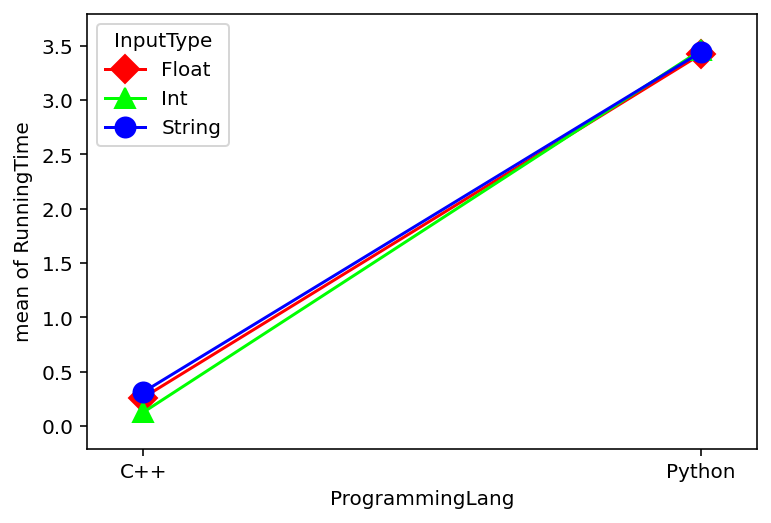

In [49]:
from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(time_data.ProgrammingLang, 
                       time_data.InputType, 
                       time_data.RunningTime, 
                       markers=['D','^','o'], ms=10) 

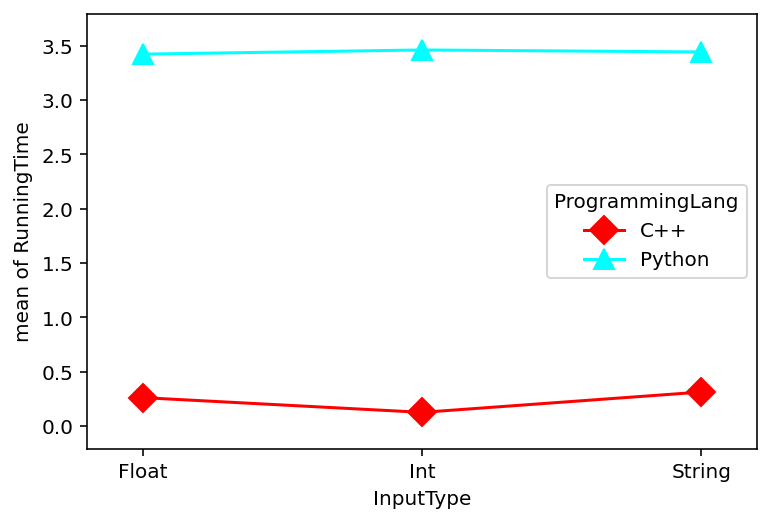

In [50]:
from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(time_data.InputType, 
                       time_data.ProgrammingLang, 
                       time_data.RunningTime, 
                       markers=['D','^'], ms=10) 

ผลลัพธ์ : ค่อนข้างขนานกัน เส้นไปในทางเดียวกัน

In [51]:
formula = 'RunningTime ~ ProgrammingLang + InputType + Algorithm'
mdl = ols(formula, data=time_data).fit()
aov_table = anova_lm(mdl, typ=1) #อย่าเพิ่ง
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
ProgrammingLang,1.0,185.130489,185.130489,721.094656,3.055047e-37
InputType,2.0,0.085827,0.042914,0.167151,8.464291e-01
Algorithm,2.0,24.852098,12.426049,48.400226,1.148987e-13
Residual,66.0,16.944533,0.256735,NaN,NaN


**ProgrammingLangs' P-value :** 3.055047e-37 = 3.055047 × 10^(-37)

**InputTypes' P-value :** 8.464291e-01 = = 0.8464291

**Algorithms' P-value :** 1.148987e-13 = 0.0000000000001148987

In [52]:
formula = 'RunningTime ~ InputType + Algorithm'
mdl1 = ols(formula, data=time_data).fit()
aov_table = anova_lm(mdl1, typ=1) #อย่าเพิ่ง
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
InputType,2.0,0.085827,0.042914,0.014228,0.985875
Algorithm,2.0,24.852098,12.426049,4.119981,0.020534
Residual,67.0,202.075022,3.016045,NaN,NaN


# เช็ค Mean Difference ของ Programming Language

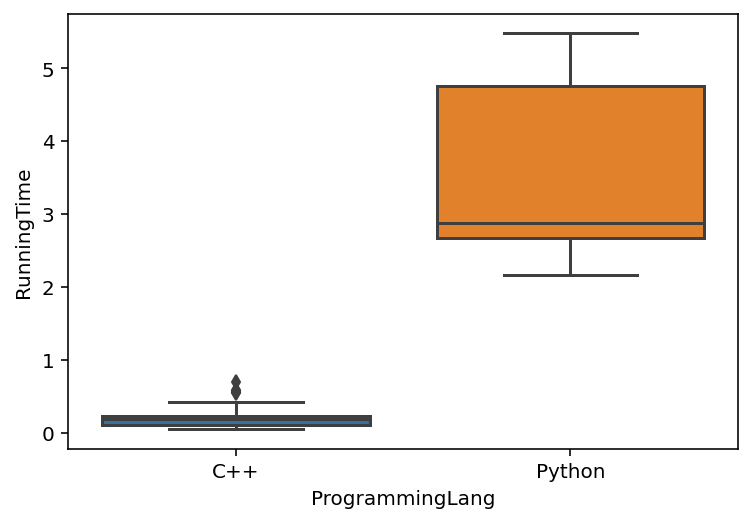

In [53]:
sns.boxplot(x='ProgrammingLang',y='RunningTime',data=time_data);

ผลลัพธ์ : Mean Difference ของ Programming Language ต่างกันอย่างชัดเจน

# เช็ค Mean Difference ของ Input Type

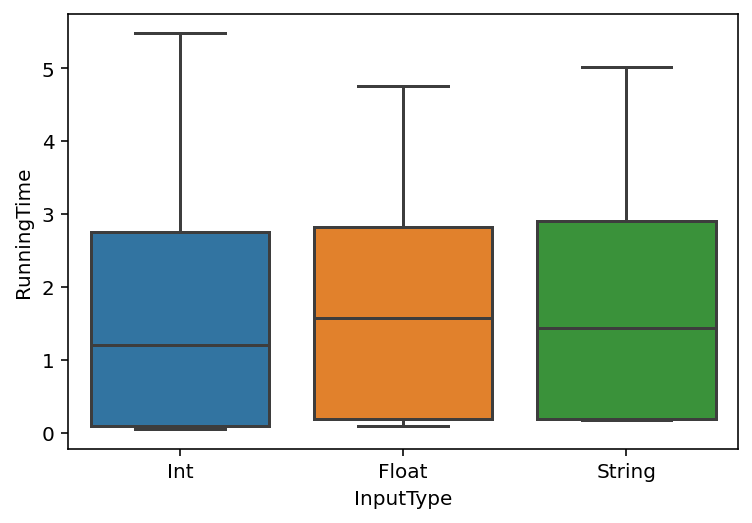

In [54]:
sns.boxplot(x='InputType',y='RunningTime',data=time_data);

## คำนวณแบบชัดเจนขึ้นด้วย Turkey's HSD test

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
 Float    Int  -0.0485   0.9 -1.3025 1.2055  False
 Float String   0.0357   0.9 -1.2182 1.2897  False
   Int String   0.0843   0.9 -1.1697 1.3382  False
--------------------------------------------------


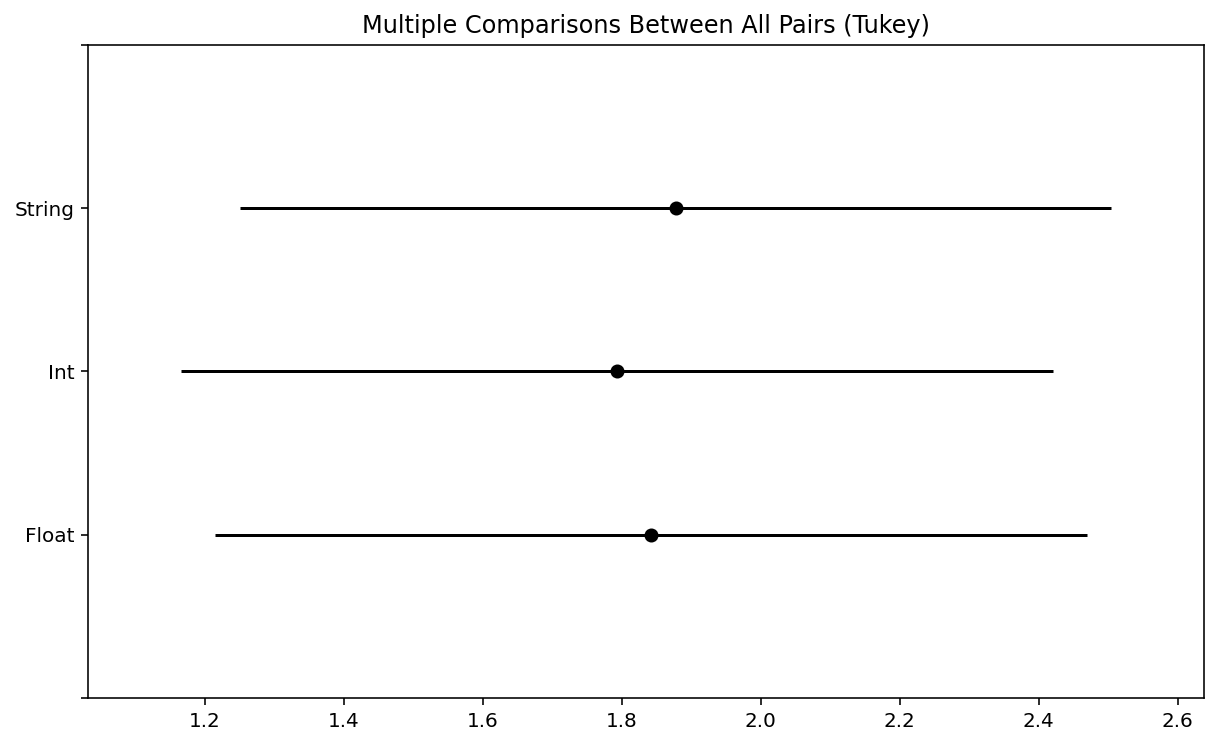

In [55]:
# alpha = Family-wise error rate
result=pairwise_tukeyhsd(time_data['RunningTime'],time_data['InputType'],alpha=0.05)
print(result)
result.plot_simultaneous();    # Plot confidence intervals of all sample means
#plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

ผลลัพธ์ : Mean Difference ของ Input Type แทบไม่ต่างกัน มีส่วนที่คร่อมกันอยู่มาก

# Normality Check Plotting

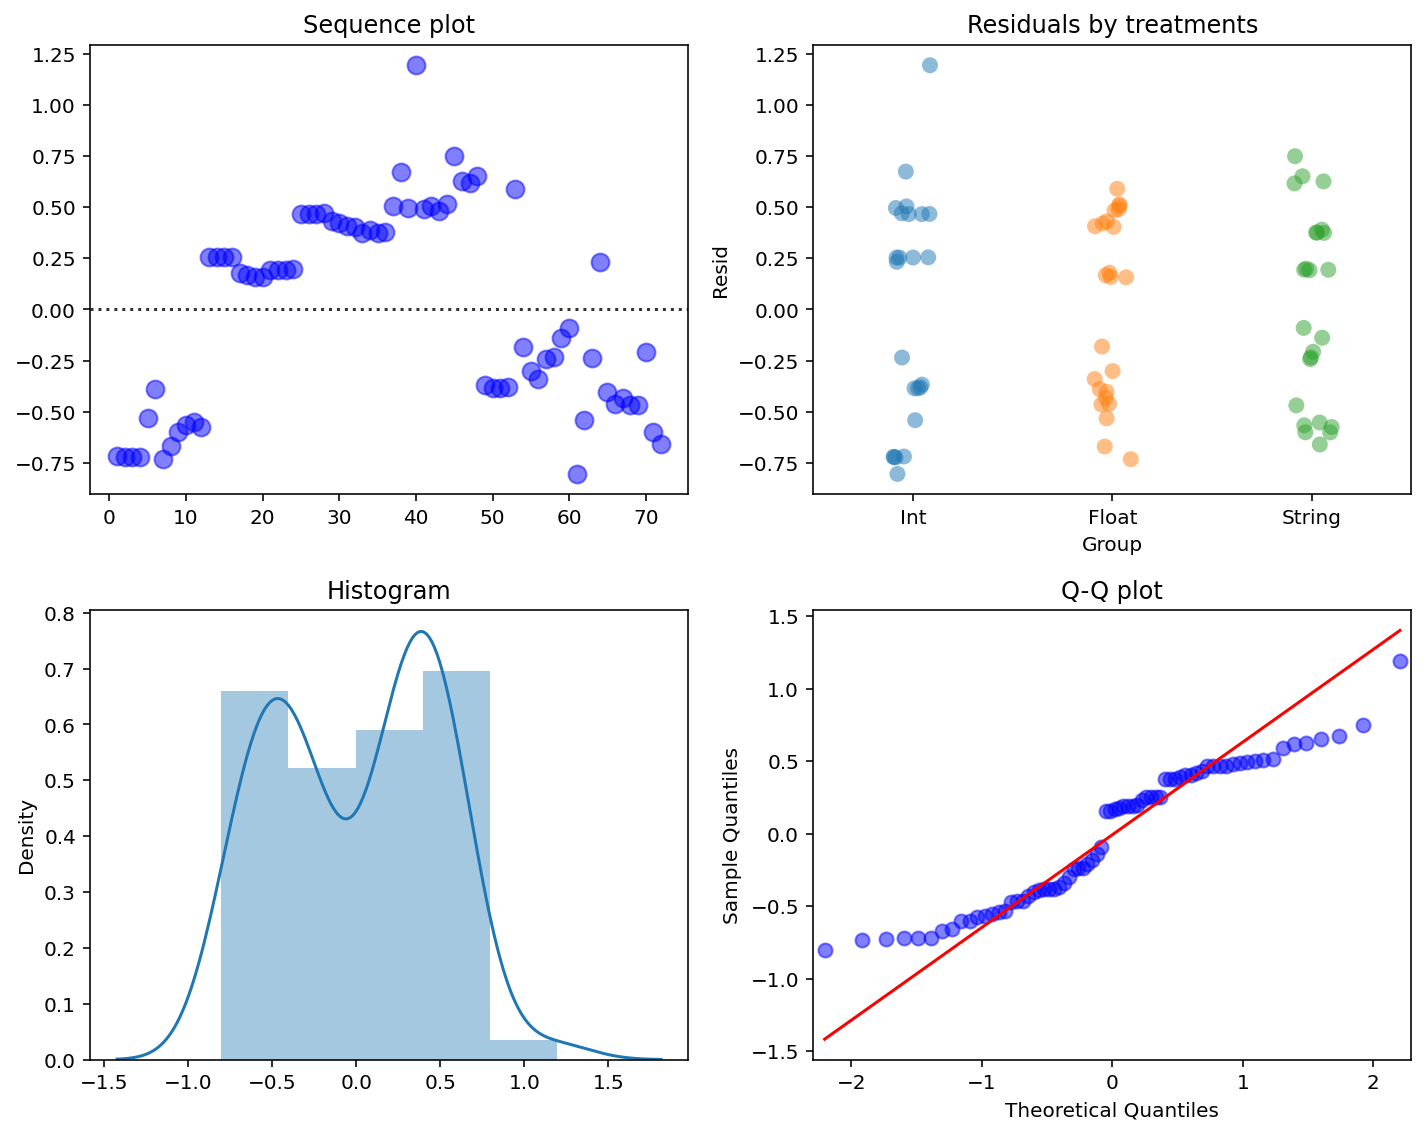

In [56]:
# ดูว่า Input เป็น Normality หรือไม่
check_anova_normality(time_data['InputType'], mod_1.resid)

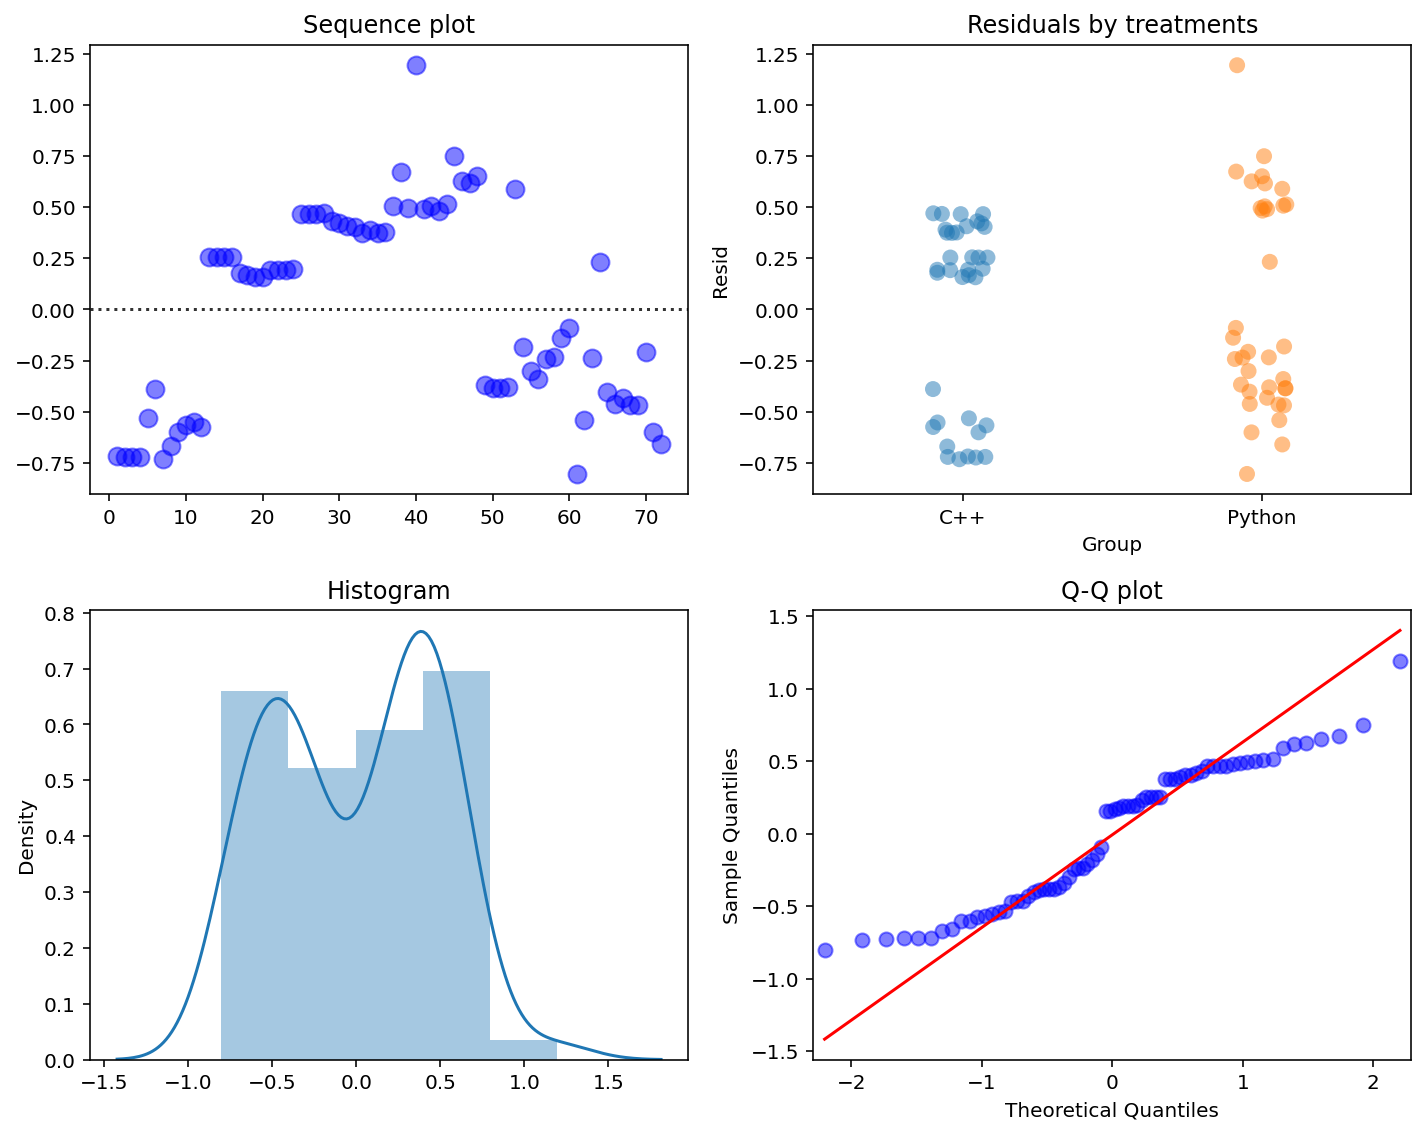

In [57]:
# ดูว่า Input เป็น Normality หรือไม่
check_anova_normality(time_data['ProgrammingLang'], mod_1.resid)

(อาจจะต้องสรุปว่าข้อมูลที่มีอยู่น้อย)

ทดสอบทางสถิติด้วย Kruskal's Wallis Test กับ InputType

In [58]:
y1 = time_data[time_data["InputType"] == 'Int' ]
y2 = time_data[time_data["InputType"] == 'Float' ]
y3 = time_data[time_data["InputType"] == 'String' ]

In [59]:
from scipy.stats import friedmanchisquare

stat, p = friedmanchisquare(y1['RunningTime'],y2['RunningTime'],y3['RunningTime'])
print('Test statistics = {:.2f}, p-value = {:.4f}'.format(stat, p))
# interpret
alpha = 0.05
if p > alpha:
  print('No effect (fail to reject H0)')
else:
  print('Effect observed (reject H0)')

Test statistics = 14.33, p-value = 0.0008
Effect observed (reject H0)


In [60]:
from scipy.stats import friedmanchisquare

result=stats.kruskal(y1['RunningTime'],y2['RunningTime'],y3['RunningTime']) 
 
print('F-statistic: {:.4f}'.format(result.statistic))
print('p-value: {:.4f}'.format(result.pvalue))

F-statistic: 1.0443
p-value: 0.5933


หาว่ามี Mean ของ level ใดใน input ที่ต่างกันบ้าง

In [61]:
from statsmodels.sandbox.stats.multicomp import multipletests
pvals = [y1['RunningTime'].mean(),y2['RunningTime'].mean(),y3['RunningTime'].mean()]

# Create a list of the adjusted p-values
rejected, p_adjusted, _, alpha_corrected = multipletests(pvals, alpha=0.05, method='bonferroni')


เช็คว่ามี P-value ของคู่ Mean ที่ Significant หรือไม่

In [62]:
rejected

array([False, False, False])

ผลเป็น False หมดแสดงว่าไม่มี mean คู่ใดที่ต่างกันเลย

In [63]:
# reject H0??
p_adjusted

array([1., 1., 1.])

In [64]:
# Print the resulting conclusions
p_adjusted

array([1., 1., 1.])

Text(0.5, 0, 'Programming Language (A)')

Text(0, 0.5, 'Average Time efficiency')

Text(0.5, 0, 'InputType (B)')

Text(0, 0.5, 'Average Time efficiency')

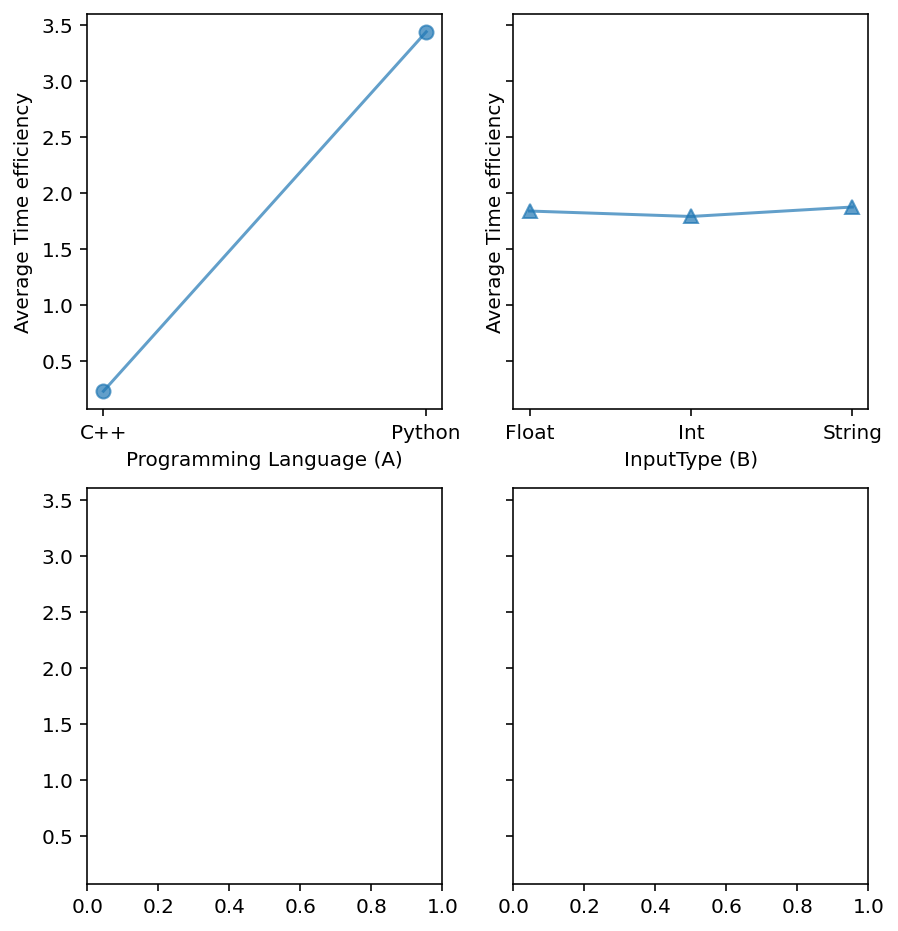

In [65]:
## Create figure with four subplots inside
# Main effect plots of Carbonation, Pressure and Linespeed (ax1, ax2, ax3)  
# Carbonation-Pressure interaction plot (ax4)

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=True, figsize=(7,8)) 


carb_effect=time_data.groupby('ProgrammingLang').aggregate({'RunningTime':'mean'}).reset_index()
ax1.plot(carb_effect.ProgrammingLang.astype('str'), carb_effect['RunningTime'],
        ms=7, marker='o', alpha=0.7)
ax1.set_xlabel('Programming Language (A)')
ax1.set_ylabel('Average Time efficiency')

carb2_effect=time_data.groupby('InputType').aggregate({'RunningTime':'mean'}).reset_index()
ax2.plot(carb2_effect.InputType.astype('str'), carb2_effect['RunningTime'],
        ms=7, marker='^', alpha=0.7)
ax2.set_xlabel('InputType (B)')
ax2.set_ylabel('Average Time efficiency')

### Your Turn: Try adding more plots on the figure
# Main effect plots of Pressure and Linespeed (ax2, ax3)  
# Carbonation-Pressure interaction plot (ax4)
# ..................

จากการสังเกต main effect ของ input type พบว่ากราฟไม่ค่อยแตกต่างกันมากนัก อาจจะเป็นเพราะว่า data ที่มีอยู่น้อย หรือจริงๆ แล้วผลลัพธ์ของเวลาที่ใช้ในการ running code อาจไม่ได้มีความสัมพันธ์กับ input type มากขนาดนั้นก็ได้